# 14-2 교차 검증과 그리드 서치

# 1. 검증 세트

- 인공지능 모델의 훈련 과정 : 훈련용 세트로 모형 도출 -> 테스트 세트로 평가

- 그런데 훈련용 세트에 집중하다 보면, 테스트 세트에 적용 시 모형의 정확도가 감소

- 즉, 과적합(Overfitting)의 문제에 직면하기 때문에 결국은 "테스트용 세트"로 
모형을 평가

  **"이런 저런 값으로 모델을 많이 만들어서 테스트 세트로 평가하면 결국 테스트 세트에 잘 맞는 모델이 만들어진다"**


- 무엇이 문제인가?

  **테스트 세트에 데이터를 적용해 정확도를 평가하는 것은 가장 마지막에 진행하며 자주 하기 어려움** 

- 이를 위해서 테스트 세트 외에 **검증용세트**를 만든다.


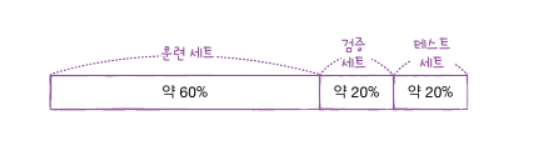

훈련세트에서 일부를 **"검증용 세트"** 를 만들어서 훈련을 수행함 

In [ ]:
#pandas로 데이터 불러오기

import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
#데이터 보기 

print(wine)

      alcohol  sugar    pH  class
0         9.4    1.9  3.51    0.0
1         9.8    2.6  3.20    0.0
2         9.8    2.3  3.26    0.0
3         9.8    1.9  3.16    0.0
4         9.4    1.9  3.51    0.0
...       ...    ...   ...    ...
6492     11.2    1.6  3.27    1.0
6493      9.6    8.0  3.15    1.0
6494      9.4    1.2  2.99    1.0
6495     12.8    1.1  3.34    1.0
6496     11.8    0.8  3.26    1.0

[6497 rows x 4 columns]


In [ ]:
#data값으로 알콜농도, 설탕량, ph(산도)
#타겟갓은 와인의 종류 : 화이트/레드

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
#데이터 확인
print(data)
print(target)


[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 ...
 [ 9.4   1.2   2.99]
 [12.8   1.1   3.34]
 [11.8   0.8   3.26]]
[0. 0. 0. ... 1. 1. 1.]


In [ ]:
#데이터를 훈련세트(80%)와 테스트세트(20%)로 나눔 

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

In [ ]:
#훈련세트(train_input)을 sub_input(진짜 훈련)과 검증용(val_input)으로 나눔 
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
#데이터 확인

print(sub_input)

[[11.4   1.25  2.95]
 [ 9.1   8.    3.23]
 [ 9.1  13.4   3.06]
 ...
 [11.5   3.    3.16]
 [12.3   9.    3.13]
 [11.1   1.4   3.34]]


In [ ]:
#데이터의 배열 확인(총 숫자)
#기존의 훈련용 데이터 셑-< 훈련용 / 검증용 
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [ ]:
#의사결정나무로 데이터 검정 
#훈련세트->모델도출->검증용 데이터 대입 -> 확인

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)

print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


훈련세트 99% 정확도

검증세트 86% 정확도

: 훈련용 세트에 과대적합

#2.  교차 검증

- 검증세트를 만들었지만 훈련세트에 사용할 데이터 수가 줄어듦 

- 그렇다고 검증용 데이터 세트를 줄이면, 과대적합이 발생 

- 어떻게 하면 안정적으로 검증이 가능할까? : **교차검증**을 활용 

**3폴드 교차검증**

- 훈련세트를 3부분으로 나눠서 수행하는 검증 방식 

- 아래는 3폴드 예시

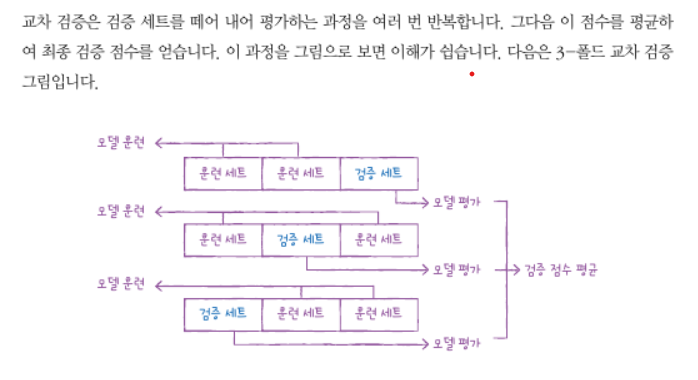

In [ ]:
#교차 검증을 위해서 cross_validate라는 함수를 활용 (기본적으로 5폴드 교차검증 수행)
# 각 폴드에서 계산한 검증점수를 평균하는 과정이 반영 
# 단 훈련세트를 다시 섞어서 폴드를 나누지는 않는다. 

from sklearn.model_selection import cross_validate

scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00840712, 0.00721383, 0.00781298, 0.00752425, 0.00710797]), 'score_time': array([0.00083065, 0.00074816, 0.00079131, 0.00074983, 0.00083685]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [ ]:
#교차검증을 활용해서 정학도를 계산함

import numpy as np

print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
# 훈련세트를 다시 섞어서 폴드를 나눈다 : startifieldKFold

from sklearn.model_selection import StratifiedKFold

scores = cross_validate(dt, train_input, train_target, cv=StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
#폴드숫자를 10으로 해서 검증
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


#3. 하이퍼파라미터 튜닝

In [ ]:
#사용자가 직접 지정해서 모형을 학습하는데, 번거롭고 여럽다. 
#파이썬의 GridSerch를 통해서 쉽게 가능 

#임의로 어떤 값을 입력 => 해당하는 결과를 쉽게 계산가능

from sklearn.model_selection import GridSearchCV

params = {'min_impurity_decrease': [0.000, 0.0005, 0.0004, 0.0006, 0.0004]}

In [ ]:
#위에서 계산한 param 값을 집어널고 모형을 훈련 
#모형을 훈련할 때, 이 과정을 위해 사용할 컴퓨터 리소스(cpu) 숫자 지정가능 : -1 (전부사용)

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)

In [ ]:
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0, 0.0005, 0.0004, 0.0006,
                                                   0.0004]})

In [ ]:
#가장 성능이 좋게 나오는 수치를 출력 (여기서는 테스트->검증용)
dt = gs.best_estimator_
print(dt.score(train_input, train_target))

0.8934000384837406


In [ ]:
#검증용 셑에서 성능이 가장 좋았던 param값을 출력
print(gs.best_params_)

{'min_impurity_decrease': 0.0004}


In [ ]:
#해당하는 값을 가지고 실제 테스트 셑에 대입해서 정확도 계산
print(gs.cv_results_['mean_test_score'])

[0.85530021 0.86761605 0.86780891 0.86338306 0.86780891]


In [ ]:
#성능이 실제 test결과 가장 좋았는 param 값을 출력 
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print(gs.cv_results_['params'][best_index])

{'min_impurity_decrease': 0.0004}


In [ ]:
#세부적인 조건을 지정하는 경우
#np.arrange -> param 값을 입력한 범위
#깊이를 5부터 20까지 1씩 증가하는 범위로 
#샘플 숫자도 2에서 100까지 10씩 증가하는 범위로  
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
          'max_depth': range(5, 20, 1),
          'min_samples_split': range(2, 100, 10)
          }

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [ ]:
#최상의 매개변수 조합?
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [ ]:
#최상의 매개변수 조합 시 정확도 
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


#4. 랜덤 서치

위 3에서의 매개변수(params) : 0.0001. 0.0002 등 범위가 간격이 일정했음

만약에 실수 범위이고, param에 입력할 값도 여러개 있다면 어떻게 해야하는가?

=> 랜섬서치를 사용


In [ ]:
#우리가 param(매개변수) 값을 지정하지 않고 랜덤으로 쉽게 구해보고 싶다. 
from scipy.stats import uniform, randint

In [ ]:
#0부터 1까지 값을 가지는 수치를 10개 샘플링
rgen = randint(0, 10)
rgen.rvs(10)

array([6, 3, 0, 9, 1, 3, 0, 6, 5, 9])

In [ ]:
#1000개를 샘플링 하는 경우
np.unique(rgen.rvs(1000), return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([104,  97,  97, 107, 108, 102, 102,  88,  95, 100]))

In [ ]:
#숫자가 아니라 수를 랜덤으로 10개 뽑는 경우
ugen = uniform(0, 1)
ugen.rvs(10)

array([0.34464812, 0.9990448 , 0.3763808 , 0.81185382, 0.58685623,
       0.8127684 , 0.3034759 , 0.93761473, 0.76003273, 0.61794493])

In [ ]:
#매개변수(papram)의 범위를 설정하는 조건식

params = {'min_impurity_decrease': uniform(0.0001, 0.001),
          'max_depth': randint(20, 50),
          'min_samples_split': randint(2, 25),
          'min_samples_leaf': randint(1, 25),
          }

In [ ]:
#조건식 중에 최적값을 어떻게 고르는가?
#위 과정을 100번 반복(n_iter)해서 교차 검증을 통해 매개변수(param) 조합을 찾아냄 

from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f06059a5c90>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f06059a5950>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f06059a5610>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f06059a5a50>},
                   random_state=42)

In [ ]:
#최적의 조합을 출력 
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [ ]:
#최적의 조합 -> 검증세트 
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [ ]:
#최적의 조합 -> 테스트 세트 
dt = gs.best_estimator_

print(dt.score(test_input, test_target))

0.86


## 확인문제

In [ ]:
#분류기준을 random으로 해서 계산 

gs = RandomizedSearchCV(DecisionTreeClassifier(splitter='random', random_state=42), params, 
                        n_iter=100, n_jobs=-1, random_state=42)
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42,
                                                    splitter='random'),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f06059a5c90>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f06059a5950>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f06059a5610>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f06059a5a50>},
                   random_state=42)

In [ ]:
print(gs.best_params_)
print(np.max(gs.cv_results_['mean_test_score']))

dt = gs.best_estimator_
print(dt.score(test_input, test_target))

{'max_depth': 43, 'min_impurity_decrease': 0.00011407982271508446, 'min_samples_leaf': 19, 'min_samples_split': 18}
0.8458726956392981
0.786923076923077
